In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
# from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv(r"C:\Users\alb\Desktop\proyectos kaggle\hr\WA_Fn-UseC_-HR-Employee-Attrition.csv")


In [2]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
X=df.drop('Attrition', axis = 1)
y=np.array(df.Attrition) 

In [4]:
# Separate the varaibles by type
# ==============================================================================
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector

# numeric_cols = X_train.select_dtypes(include=['float64','int']).columns.to_list()
cat_cols = X.select_dtypes(include=['object','category']).columns.to_list()
num_cols= X.drop(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
                     'MaritalStatus','Over18','OverTime'],axis=1)
numeric_cols=num_cols.columns.to_list()

# Transforming numerica variables
numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                            ('scaler', StandardScaler())])

In [5]:
# Transforming the categorical variables
categorical_transformer = Pipeline(
                            steps=[
                                ('imputer', SimpleImputer(strategy='most_frequent')),
                                ('onehot', OneHotEncoder(handle_unknown='ignore'))
                            ]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough'
                )


In [6]:
X_prep = preprocessor.fit_transform(X)
# X_prep1  = preprocessor.transform(X_prep)

In [7]:
X_prep

array([[ 0.4463504 ,  0.74252653, -1.01090934, ...,  1.        ,
         0.        ,  1.        ],
       [ 1.32236521, -1.2977746 , -0.14714972, ...,  1.        ,
         1.        ,  0.        ],
       [ 0.008343  ,  1.41436324, -0.88751511, ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [-1.08667552, -1.60518328, -0.64072665, ...,  1.        ,
         0.        ,  1.        ],
       [ 1.32236521,  0.54667746, -0.88751511, ...,  1.        ,
         1.        ,  0.        ],
       [-0.32016256, -0.43256792, -0.14714972, ...,  1.        ,
         1.        ,  0.        ]])

In [8]:
# Convert the output to a dataframe and add the name of the columns
encoded_cat = preprocessor.named_transformers_['cat']['onehot']\
              .get_feature_names(cat_cols)
labels = np.concatenate([numeric_cols, encoded_cat])

In [9]:
len(numeric_cols)+len(encoded_cat)

55

In [10]:
#Create datos_train_prep
datos_train_prep = preprocessor.transform(X)
datos_train_prep.shape
datos_train_prep = pd.DataFrame(datos_train_prep, columns=labels)
datos_train_prep

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0.446350,0.742527,-1.010909,-0.891688,0.0,-1.701283,-0.660531,1.383138,0.379672,-0.057788,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,1.322365,-1.297775,-0.147150,-1.868426,0.0,-1.699621,0.254625,-0.240677,-1.026167,-0.057788,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.008343,1.414363,-0.887515,-0.891688,0.0,-1.696298,1.169781,1.284725,-1.026167,-0.961486,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,-0.429664,1.461466,-0.764121,1.061787,0.0,-1.694636,1.169781,-0.486709,0.379672,-0.961486,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,-1.086676,-0.524295,-0.887515,-1.868426,0.0,-1.691313,-1.575686,-1.274014,0.379672,-0.961486,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,0.202082,1.703764,-0.891688,0.0,1.721670,0.254625,-1.224807,1.785511,-0.057788,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1466,0.227347,-0.469754,-0.393938,-1.868426,0.0,1.723332,1.169781,-1.175601,-1.026167,0.845911,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1467,-1.086676,-1.605183,-0.640727,0.085049,0.0,1.726655,-0.660531,1.038693,1.785511,-0.057788,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1468,1.322365,0.546677,-0.887515,0.085049,0.0,1.728317,1.169781,-0.142264,-1.026167,-0.057788,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(datos_train_prep, df.Attrition, test_size=0.33, random_state=42)

from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
# from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

models = []
models.append(('LogisticRegression', LogisticRegression()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
# models.append(('XGBClassifier', XGBClassifier()))
models.append(('GradientBoostingClassifier', GradientBoostingClassifier()))
models.append(('MLPClassifier', MLPClassifier()))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('RandomForestClassifier', RandomForestClassifier()))

# models.append(('GradientBoostingRegression', GradientBoostingRegressor()))
# models.append(('MLPRegression', MLPRegressor()))
# models.append(('KNeighborsRegression', KNeighborsRegressor()))
models.append(('RandomForestRegression', RandomForestRegressor()))

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=0)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LogisticRegression: 0.864708 (0.050408)
DecisionTreeClassifier: 0.776366 (0.040233)
GradientBoostingClassifier: 0.859709 (0.031202)
MLPClassifier: 0.837322 (0.034259)
KNeighborsClassifier: 0.836384 (0.040208)
RandomForestClassifier: 0.857679 (0.031630)
RandomForestRegression: nan (nan)


Use the LogisticRegression to create the prediction

In [12]:
reg = LogisticRegression(random_state=0)

In [13]:
#change the values yes and no to 1 and 0 on y train and test
y_train = [1 if i=="Yes" else 0 for i in y_train]
y_test = [1 if i=="Yes" else 0 for i in y_test]

In [14]:
#y_train

In [15]:
#Fit the model using x train and test
reg.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [16]:
#predict
reg.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [17]:
#accuracy score using x test and y test
reg.score(X_test, y_test)

0.8765432098765432

In [18]:
X1= np.asarray(X_test)

In [19]:
yhat4=reg.predict(X1)

In [20]:
dfc = pd.DataFrame({"prediction":yhat4,"y.test":y_test})
dfc

,prediction,y.test
0,0,0
1,0,0
2,0,1
3,0,0
4,0,0
...,...,...
481,0,0
482,0,0
483,0,0
484,0,0


In [21]:
xi=[]
for i,j in zip(yhat4,y_test):
    if i==j:
        x="TRUE"
        xi.append(x)
    else:
        y="FALSE"
        xi.append(y)
        
dfc["hit the target"] = xi

In [25]:
dfc.head()

,prediction,y.test,hit the target
0,0,0,TRUE
1,0,0,TRUE
2,0,1,FALSE
3,0,0,TRUE
4,0,0,TRUE


In [23]:
resultado=dfc["hit the target"].value_counts()

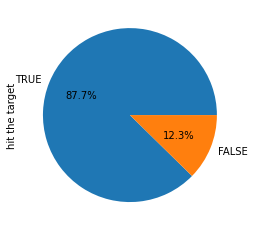

In [24]:
resultado.plot.pie(autopct="%.1f%%");